In [4]:
from libs import io , cv2 , os , pd

import preprocessing as pp
import roi as roi
import detection as detect
from classifier import H3T_Classifier


In [5]:
# INIT
sign_imgs_corr = detect.get_corrleation_matrices("../dataset/signs")


classifier = H3T_Classifier()
classifier.prepare_training_data("../dataset/training")
classifier.train(mode = "svm")




FileNotFoundError: [WinError 3] The system cannot find the path specified: '../dataset/training/speed_30/'

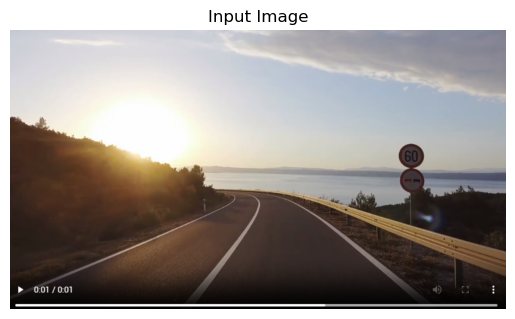

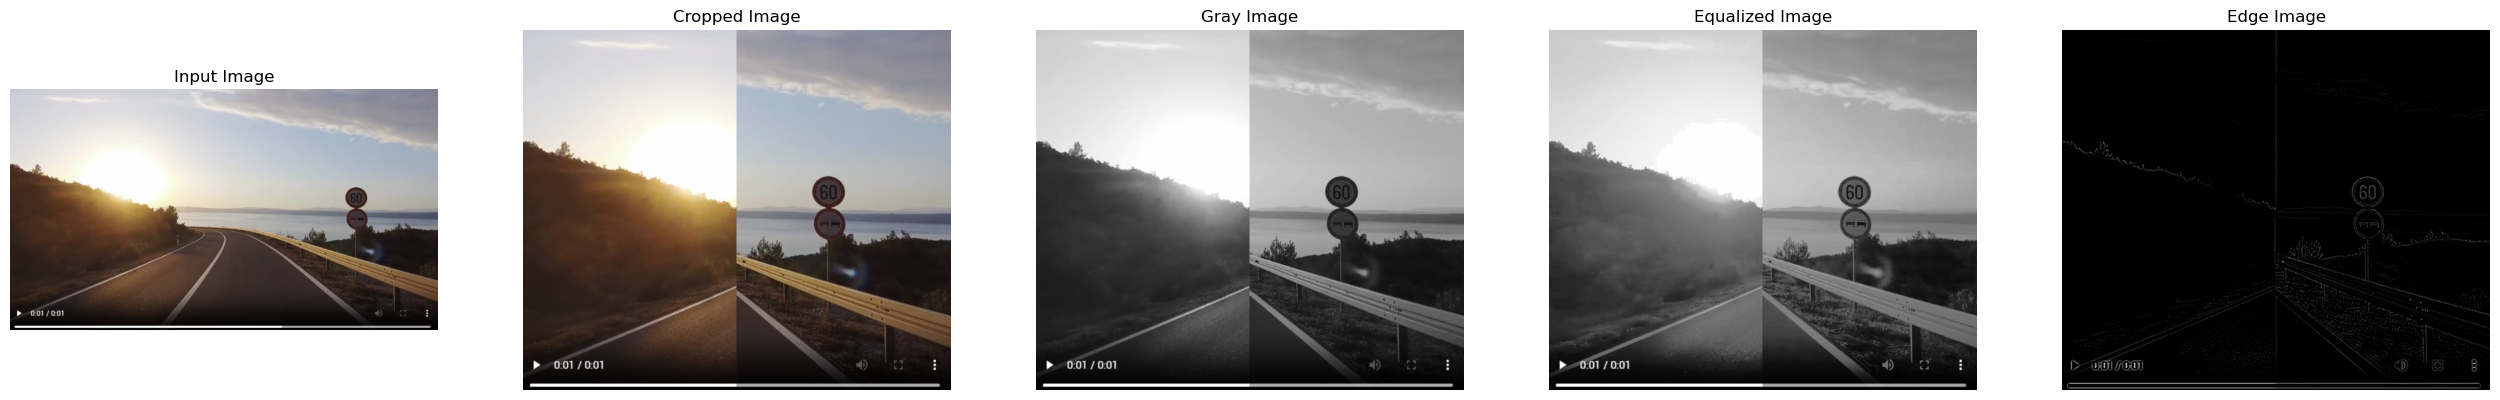

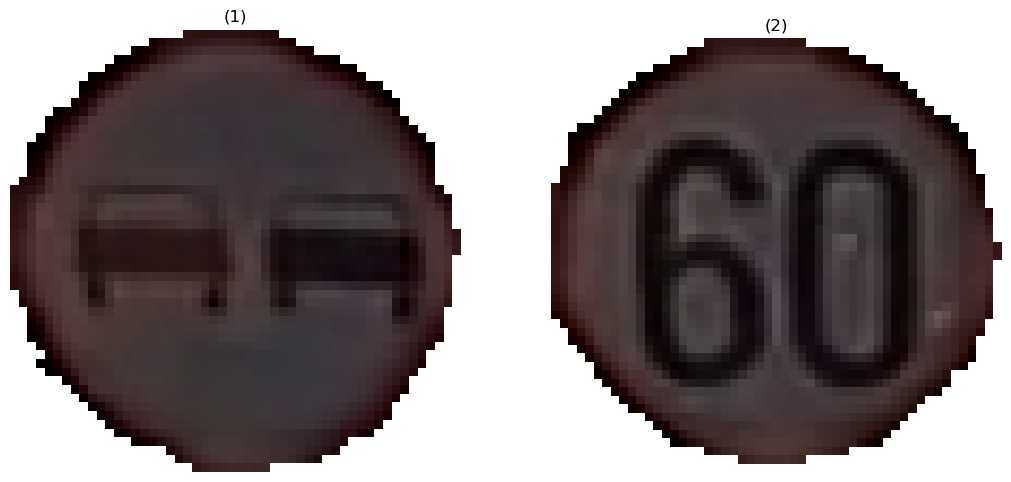

NameError: name 'detect' is not defined

In [ ]:
# Load the image
image = io.imread("../dataset/testcase11.PNG")

image = cv2.resize(image, (1280, 720))

pp.show_images([image], ["Input Image"])

cropped_img = cv2.hconcat([image[:, :(image.shape[1] // 3)]  , image[:, 2 * (image.shape[1] // 3):]])

# Convert the image to grayscale
gray_image = pp.gray_image(cropped_img)

equalized_image = pp.HistogramEqualization(gray_image)

# Apply edge detection
edge_image = pp.LoGEdgeDetection(equalized_image)

# show pp images
pp.show_images([image , cropped_img, gray_image , equalized_image , edge_image], ["Input Image", "Cropped Image", "Gray Image", "Equalized Image", "Edge Image"])

# Extract ROIs
rois = roi.extract_roi(edge_image, cropped_img)

#show rois
pp.show_images(rois)

# Detect signs
index = detect.detect_sign(rois, sign_imgs_corr)

if index != -1:
    pp.show_images([rois[index]], ["sign_detected"])
    print(f'prediction is {classifier.predict(rois[index])}')
else:
    print("no sign detected")


